**Pokemon Analytics**<br>
**Autor: Carlos Mario Hoyos Rios**<br>
**Este notebook tiene como objetivo realizar una exploracion inicial de el dataset inicial pokemon.csv**

(800, 13)
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


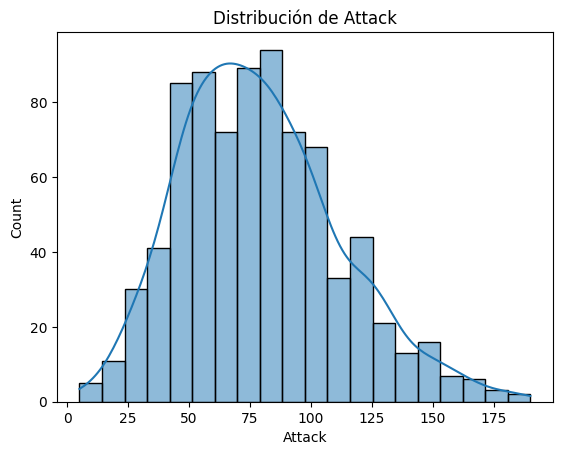

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df = pd.read_csv('../data/raw/pokemon.csv')

# Verificar como estan los datos presentados
print(df.shape)
print(df.head())

# Se realiza una visualizacion grafica inicial para evidenciar que si estan cargando los graficos
sns.histplot(df['Attack'], kde=True)
plt.title('Distribución de Attack')
plt.show()


In [7]:
#revision del dataset y sus columnas
print(df)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [9]:
#Revision de sus columnas
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [11]:
#verificacion de los tipos de datos y su cantidad
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [13]:
#mostrar una estadistica inicial de los datos
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [15]:
#consultamos una de las columnas para revisar su correcta presentacion
pokemon_nombre = df['Name']
pokemon_nombre.head(20)

0                     Bulbasaur
1                       Ivysaur
2                      Venusaur
3         VenusaurMega Venusaur
4                    Charmander
5                    Charmeleon
6                     Charizard
7     CharizardMega Charizard X
8     CharizardMega Charizard Y
9                      Squirtle
10                    Wartortle
11                    Blastoise
12      BlastoiseMega Blastoise
13                     Caterpie
14                      Metapod
15                   Butterfree
16                       Weedle
17                       Kakuna
18                     Beedrill
19        BeedrillMega Beedrill
Name: Name, dtype: object

In [17]:
#Revision inicial de campos con datos nulos
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [19]:
#exploracion incial de cuantos tipos de pokemon existen
tipos = df['Type 1'].value_counts()
print(tipos)

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


In [21]:
#Revision inicial de cuantas regiones existen
Region = df['Generation'].value_counts()
print(Region)

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64


In [39]:
# Validacion inicial de cuantas megaevoluciones existen
#inicialmente validamos en la culumna name cuantos pokemon tienen la palabra mega en su nombre 
mega = df['Name'].str.contains("mega", case = False)
numero_megas = mega.sum()
print(numero_megas)

50
